Hi! 

After reading the articles I decided to try a simple approach based on statistical features of the url – just as mentioned in *Know Your Phish: Novel Techniques for Detecting Phishing Sites and their Targets* and *PhishAri:
Automatic Realtime Phishing Detection on Twitter*. In addition, I decided to check the number of redirects, since multiple redirects can confuse the user and the phishing site can avoid to be reported to e.g. PhishTank or Google Safe Browsing. For this reason, I also checked the statistical features of the url for the landing url and not only for the starting url. 

A very natural next step would be to use the PhishTank or Google SafeBrowsing API (or why not both) to check all of the urls – I did however not implement it because the source of my test data was PhishTank, so the results would not have been very interesting. 

In [1]:
#taken from phishtank 10.2.2021 (and a few from original assignment)
example_urls = ["https://www.slideshare.net/weaveworks/client-side-monitoring-with-prometheus",
                "https://intezasanpaolo.com/",
                "http://sec-login-device.com/",
                "http://college-eisk.ru/cli/",
                "https://protocolofdcr-fi.com/preguntas-frecuentes.html",
                "https://s.post.ch.customer-package.net.u1292505.cp.regruhosting.ru/ch/paie_clients/1111/",
                "http://colaisteghobnait.net/lebtbbgbql.html?HVtEWzRdxTfcVGvBHJInIkOMJIbhUvgFCdgXsEXRDCfGVhBJniNUHGYV",
                "https://community-post-mail.com/po/",
                "https://centralldaconsulta.com/",
                "http://www.impotspublicservice.com/2eb8d9e9cf0704a9c43ae950280edd43/",
                "http://52.247.217.14/banks/Meridian/",
                "https://tan2go-service.com/dkb",
                "https://soo.gd/1RqA?Rs1083",
                "https://fixe-orange2.yolasite.com/",
                "https://www.amazon-azom.top/",
                "http://glued-preference.000webhostapp.com/",
                "http://grupwhatsapp.mpdcollege.org.in/",
                "http://grupwhatsapp2.qpoe.com/",
                "http://chatwhatsapp-18.sexidude.com/",
                "http://allure.gr/wp-content/index.html?HVtEWzRdxTfcVGvBHJInIkOMJIbhUvgFCdgXsEXRCDfGVhBJniNUHYGV",
                "https://lemosomc.com/gleed/gleeds_co_uksourcedoc9CB20F6942AE/60102457i2E9AE8133647j69i60j69i57j69i60l33666j0j7&amp;sourceidv/b3268586089630f8d0546aab71021b69/",
                "https://freegroup18plus.000webhostapp.com/",
                "https://kacong86.000webhostapp.com/",
                "https://www.grupwhatsapp2.qpoe.com/",
                "http://exceptive-cargoes.000webhostapp.com/",
                "http://www.uk-delivery.support/RoyalMail/verifylogin.php?&amp;sessionid=$hash&amp;securessl=true",
                "http://new-halibeneficiary.co.uk/",
                "http://swap-giffgaff.support/",
                "https://www.jdaijglksd.top/pc",
                "https://www.grupwhatsapp2.qpoe.com/login.php",
                "https://www.cancellation-payee-app.com/Login.php",
                "https://www.deny-secure-payee.com/Login.php",
                "https://www.apple-i.cloud-locked.com/twofactor.php",
                "https://www.app-payee-cancellation.com/Login.php",
                "https://testenglish.club/sec0re/verification.php",
                "https://suspfacebookcom-05851104.nightaway.ca/connect.html?timelimit=0151c0f72d5ce196291e71c44e91aa7d",
                "https://tenisclubemc.com.br/Connections/xx/",
                "https://testenglish.club/sec0re/signin.php",
                "https://payee-confirm.co/secure/",
                "https://themarkadvantage.com/confirm-password",
                "https://busquaich.com/offie2021/3d/3d",
                "https://abonnement-fr-fr.com/loading.php?cmd=login_submit&amp;id=&amp;session=",
                "https://alpine-hazel-beetle.glitch.me/?email="
               ]

Here I extract the features and store them in a dictionary with one entry for each url. The value of the key-value pair where the key is the url is another dictionary with the features. 

In [2]:
import requests

def get_request_object(url):
  try:
      return requests.get(url)
  except:
    print('Problem with http request – skipping url: ' + url)

#high amount of redirects suspicious
def count_redirects(request_object):
      return {'redirects' : len(request_object.history)}

#statistical features of the urls
def get_url_features(url, prefix):
    feature_dict = {}
    feature_dict[prefix + 'url_length'] = len(url)
    splitted = url.split('/')
    domain = splitted[2]
    #domain levels are counted as dots, in reality they are dots + 1
    feature_dict[prefix + 'domain_levels'] = domain.count('.')
    #count dots in last part of url
    freeurl = url[(url.index(domain) + len(domain) + 1):]
    feature_dict[prefix + 'free_url_dots'] = freeurl.count('.')
    feature_dict[prefix + 'free_url_levels'] = freeurl.count('/')
    return feature_dict

#driver function for getting the dictionary with urls and features
def get_dict(url_list):
  url_dict = {}

  for url in url_list:
      #the urls can have different formats, make sure they all include http:// or https://
      url = url if url.startswith('http') else ('http://' + url)
      request_object = get_request_object(url)
      if request_object:
        redirect_dict = count_redirects(request_object)
        url_features_dict = get_url_features(url, 'start_')
        landing_url = request_object.url
        landing_url_features_dict = get_url_features(landing_url, 'landing_')
        feature_dict = {**redirect_dict, **url_features_dict, **landing_url_features_dict}
        url_dict[url] = feature_dict

  return url_dict

Time to visualize! I chose to visualize the length of the url. I plotted them for starting urls and landing urls (the original url and the one it redirects to, that is). 

Problem with http request – skipping url: https://centralldaconsulta.com/
Problem with http request – skipping url: http://swap-giffgaff.support/
Problem with http request – skipping url: https://www.jdaijglksd.top/pc
Problem with http request – skipping url: https://www.cancellation-payee-app.com/Login.php
Problem with http request – skipping url: https://www.apple-i.cloud-locked.com/twofactor.php
Problem with http request – skipping url: https://www.app-payee-cancellation.com/Login.php
Problem with http request – skipping url: https://themarkadvantage.com/confirm-password
Problem with http request – skipping url: https://abonnement-fr-fr.com/loading.php?cmd=login_submit&amp;id=&amp;session=


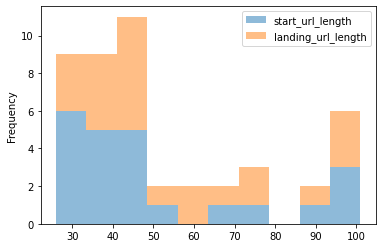

In [3]:
import pandas as pd

url_dict = get_dict(example_urls)
data_dict = {}
data_dict['start_url_length'] = [n['start_url_length'] for n in url_dict.values()]
data_dict['landing_url_length'] = [n['landing_url_length'] for n in url_dict.values()]

df = pd.DataFrame.from_dict(data_dict)
df.plot.hist(alpha=0.5, stacked=True)

The above graph tells me that most of the malicious urls are under 40 characters long, but a fair deal of them also go over that number. The urls the malicious urls redirect to seem to be slightly longer than the original ones on average.

Quite interesting! But let's have some fun and check how this compares with urls from a probable whitelist.

In [4]:
#taken from cisco umbrella 10.2.2021
white_urls = [
              "www.bing.com",
              "googletagmanager.com",
              "www.googletagmanager.com",
              "windows.com",
              "teams.microsoft.com",
              "digicert.com",
              "lh3.googleusercontent.com",
              "adservice.google.com",
              "windows.net",
              "amazonaws.com",
              "tile-service.weather.microsoft.com",
              "googlevideo.com",
              "stats.g.doubleclick.net",
              "ocsp.digicert.com",
              "content-autofill.googleapis.com",
              "beacons.gcp.gvt2.com",
              "yahoo.com",
              "clients6.google.com",
              "android.clients.google.com",
              "prod.do.dsp.mp.microsoft.com",
              "www.apple.com",
              "connect.facebook.net",
              "yt3.ggpht.com",
              "do.dsp.mp.microsoft.com",
              "presence.teams.microsoft.com",
              "opendns.com",
              "crl.identrust.com",
              "akamai.net",
              "ib.adnxs.com",
              "akamaihd.net",
              "cdnjs.cloudflare.com",
              "mesu.apple.com",
              "odc.officeapps.live.com",
              "safeframe.googlesyndication.com",
              "tsfe.trafficshaping.dsp.mp.microsoft.com",
              "ocsp.pki.goog",
              "nexus.officeapps.live.com",
              "pubmatic.com",
              "c10r.facebook.com",
              "demdex.net",
              "safebrowsing.google.com",
]

Problem with http request – skipping url: http://prod.do.dsp.mp.microsoft.com
Problem with http request – skipping url: http://do.dsp.mp.microsoft.com
Problem with http request – skipping url: http://presence.teams.microsoft.com
Problem with http request – skipping url: http://akamai.net
Problem with http request – skipping url: http://akamaihd.net
Problem with http request – skipping url: http://safeframe.googlesyndication.com
Problem with http request – skipping url: http://tsfe.trafficshaping.dsp.mp.microsoft.com
Problem with http request – skipping url: http://nexus.officeapps.live.com
Problem with http request – skipping url: http://c10r.facebook.com
Problem with http request – skipping url: http://demdex.net


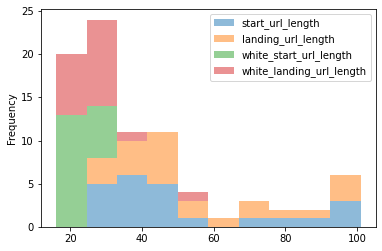

In [5]:
white_url_dict = get_dict(white_urls)

white_data_dict = {}
white_data_dict['white_start_url_length'] = [n['start_url_length'] for n in white_url_dict.values()]
white_data_dict['white_landing_url_length'] = [n['landing_url_length'] for n in white_url_dict.values()]

df2 = pd.DataFrame.from_dict(white_data_dict)
total_df = pd.concat([df, df2], axis=1)
total_df.plot.hist(alpha=0.5, stacked = True)


That's very cool! 

Here we can see that the urls from the whitelist (plotted in green for start url and red for landing url) are notably shorter than the malicious ones. We also see the same trend, that the landing url is slightly longer than the starting url, for the whitelisted urls – so this does not seem to indicate that a site is a phishing site.

After 60 characters there are no whitelist sites on this graph, which would indicate that 60 chars might be a good cutoff value for the length of the url for a prediction model. There are also very few whitelisted urls after 30 chars, so depending on the other features of the model 30 could also be a candidate cutoff number.


However, I would think twice about drawing conclusions from a dataset of this size – but if this is all we have, we still get an indication. We would need larger datasets to test on and to include more features to actually make a prediction model, but this is a quite good start!

